In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.formula.api import logit
from statsmodels.api import Logit

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Logistic Regression

Let us recall from previous lecture that regression tasks are special examples of supervised learning algorithms where the independent variables and dependent variables are both numerical and the model has the shape

$$ y_i \approx \beta x_i + \alpha + \epsilon $$

where $\alpha$ and $\beta$ are constants to be determined and $\epsilon \sim N(0,\sigma)$.

There are, however, some assumptions that we do not mention often:

1. $x_i$'s are real random vectors.
2. $y_i$'s are real numbers that can be both negative and positive.

But what happens if we relax the second condition. One such common case is when $y_i$'s are not real random variable but binary categorical variable such as YES or NO.


## Underlying assumption

Assume we have a collection of data points $(x_i,y_i)$ where $x_i\in\mathbb{R}^n$ and $y_i\in\{0,1\}$. Now, assume that there is a hyper-plane $P$ that separates points $x_i$ whose $y_i=0$, and points $x_i$ whose $y_i=1$. Any such hyper-plane $P$ has the equation $ n\cdot \mathbf{x} + b = 0 $ where $n$ is the normal vector of the hyper-plane and $b$ is the displacement.


> Question: We know that such hyper-planes divide $\mathbb{R}^n$ into 2 pieces. Given a point $\mathbf{x}$ in $\mathbb{R}^n$, how can we figure out which side of the hyperplane $P$ it resides?


## The logistic function

We need a function that exaggerate negative and positive values. Something that converges to 0 fast the negative $x$-axis, and something that converges to 1 fast on the positive $x$-axis. [The logistic function]() does exactly that

$$ \sigma(x) = \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}} $$




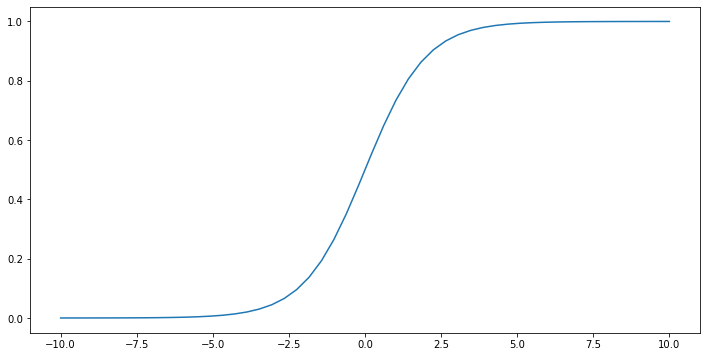

In [4]:
xs = np.linspace(-10,10,50)
ys = 1/(1+np.exp(-xs))
plt.figure(figsize=(12,6))
plt.plot(xs,ys)

## Logistic Regression

Let us say that the probability of a point ${\mathbf x}$ being on the positive side of the hyper-plane ${\mathbf n}\cdot {\mathbf x}+b=0$ is 

$$\frac{1}{1+e^{-{\mathbf n}\cdot {\mathbf x} - b}}$$

Using this we can write a probability function $p({\mathbf x},y)$ that a point ${\mathbf x}$ having $y$ as the response as follows:

$$p({\mathbf x},y) = \left(\frac{1}{1+e^{-{\mathbf n}\cdot {\mathbf x} - b}}\right)^y \left(\frac{1}{1+e^{{\mathbf n}\cdot {\mathbf x} + b}}\right)^{1-y} $$
which measures the probability of ${\mathbf x}$ being on the right side where $y$ takes values 0 or 1.  Then the probability that all of the points in our dataset being on the right side is 

$$ p(D) = \prod_{i=1}^n p(x_i,y_i) $$ 

and therefore we would like to maximize $p(D)$ depending on the unknown parameters ${\mathbf n}\in\mathbb{R}^n$ and $b$. Instead one can minimize the following function 

$$ LE({\mathbf n},b) = -\frac{1}{n}\sum_{i=1}^n y_i\log(1+e^{-{\mathbf n}\cdot x_i - b}) + (1-y_i)\log(1+e^{{\mathbf n}\cdot x_i + b}) $$ 

which is just the natural logarithm of $p(D)$. Then the best-fitting ${\mathbf n}$ and $b$ is given by 

$$ \text{argmin}_{{\mathbf n,b}} LE({\mathbf n},b) $$



## An Example

Here is a simple example. We are going to consider the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris):

In [5]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['a','b','c','d','p']
iris

,a,b,c,d,p
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
X = iris.iloc[:,:4]
y = iris.iloc[:,4]

encoder = OneHotEncoder(sparse=False)
yy = encoder.fit_transform(np.array(y).reshape(-1,1))

res = pd.concat([X,pd.DataFrame(yy)],axis=1)
res.columns = ['a','b','c','d','p1','p2','p3']
res

model = logit('p3 ~ a + b + c + d', data=res).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.039662
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     p3   No. Observations:                  150
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            4
Date:                Mon, 24 Oct 2022   Pseudo R-squ.:                  0.9377
Time:                        13:39:13   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                 1.189e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.6378     25.708     -1.659      0.097     -93.024       7.748
a             -2.4652      2.394     -1.030      0.303      -7.158       2.228
b             -6.6809      4.480     -1.491      0.136     -15.461       2.099
c              9.4294      4.737      1.990      0.047       0.145      18.714
d             18.2861      9.743      1.877      0.061      -0.809      37.381
==============================================================================

Possibly complete quasi-separation: A fraction 0.73 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model1 = LogisticRegression(max_iter=1500)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

1.0

## Another Example

This time I am going use [Cancer Remission Dataset from UPenn](https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/leukemia_remission.txt):

> The predictor variables are cellularity of the marrow clot section (CELL), smear differential percentage of blasts (SMEAR), percentage of absolute marrow leukemia cell infiltrate (INFIL), percentage labeling index of the bone marrow leukemia cells (LI), absolute number of blasts in the peripheral blood (BLAST), and the highest temperature prior to start of treatment (TEMP).

In [65]:
cancer = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/leukemia_remission.txt',sep='\t')
cancer

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.80,0.83,0.66,1.9,1.10,1.00
1,1,0.90,0.36,0.32,1.4,0.74,0.99
2,0,0.80,0.88,0.70,0.8,0.18,0.98
3,0,1.00,0.87,0.87,0.7,1.05,0.99
4,1,0.90,0.75,0.68,1.3,0.52,0.98
5,0,1.00,0.65,0.65,0.6,0.52,0.98
6,1,0.95,0.97,0.92,1.0,1.23,0.99
7,0,0.95,0.87,0.83,1.9,1.35,1.02
8,0,1.00,0.45,0.45,0.8,0.32,1.00
9,0,0.95,0.36,0.34,0.5,0.00,1.04


In [66]:
model = logit('REMISS ~ CELL + SMEAR + INFIL + LI + BLAST + TEMP', data=cancer).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.399886
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 REMISS   No. Observations:                   27
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            6
Date:                Mon, 24 Oct 2022   Pseudo R-squ.:                  0.3718
Time:                        13:58:52   Log-Likelihood:                -10.797
converged:                       True   LL-Null:                       -17.186
Covariance Type:            nonrobust   LLR p-value:                   0.04670
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.2581     74.965      0.857      0.391     -82.670     211.187
CELL          30.8301     52.135      0.591      0.554     -71.353     133.013
SMEAR         24.6863     61.526      0.401      0.688     -95.903     145.275
INFIL        -24.9745     65.281     -0.383      0.702    -152.923     102.974
LI             4.3605      2.658      1.641      0.101      -0.849       9.570
BLAST         -0.0115      2.266     -0.005      0.996      -4.453       4.430
TEMP        -100.1734     77.753     -1.288      0.198    -252.567      52.220
==============================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [92]:
def bootstrap(X,y):
    res = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5)
        model = LogisticRegression()
        model.fit(X_train,y_train)
        res.append(model.score(X_test,y_test))
    tmp = sorted(res)[3:97]
    return (min(tmp),max(tmp))

In [93]:
X = cancer[['CELL', 'SMEAR', 'INFIL', 'LI', 'BLAST', 'TEMP']]
y = cancer['REMISS']

bootstrap(X,y)

(0.42857142857142855, 0.8571428571428571)

## Another Example



In [34]:
import yfinance as yf

In [35]:
df = yf.download('NDX')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000
1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000
1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000
1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000
1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000
...,...,...,...,...,...,...
2022-10-17,10967.250000,11090.870117,10959.740234,11062.530273,11062.530273,4439190000
2022-10-18,11368.759766,11374.379883,11035.799805,11147.740234,11147.740234,5047360000
2022-10-19,11081.820312,11231.459961,11008.110352,11103.379883,11103.379883,4955090000


In [103]:
X = df['Open']
y = df['Close'] > df['Open']
       
bootstrap(np.array(X).reshape((-1,1)),np.array(y))

(0.5302932990794262, 0.5499892956540355)

In [63]:
model = LogisticRegression()
model.fit(np.array(X).reshape((-1,1)),y)
model.score(np.array(X).reshape((-1,1)),y)

0.5470991222436309

In [101]:
X.shift(1)

Date
1985-10-01             NaN
1985-10-02             NaN
1985-10-03      112.139999
1985-10-04      110.824997
1985-10-07      110.870003
                  ...     
2022-10-17    11033.580078
2022-10-18    10692.059570
2022-10-19    11062.530273
2022-10-20    11147.740234
2022-10-21    11103.379883
Name: Close, Length: 9342, dtype: float64